## Step 1: Modelling the inputs

- Neuron can respond preferentially to a visual stimulus of a certain orientation  θ0 
    -  θ0: orientation of a bar expressed in radian
    - θ1: preferred orientation
- neurons in visual cortex receive tuned inputs from the thalamus
- magnitude of these inputs hi^ext is proportional to the diference between its preferred orientation  θ1 and orientation of the stimuli  θ0:

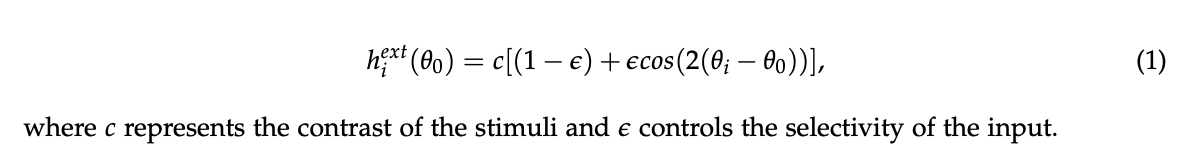

### Task 1.1

<b> 1 Write a MATLAB function computing hi^ext </b>

- Note that MATLAB can operate with vectors, and use this property to compute the inputs for N = 50 neurons with a preferred direction varying from −π/2 to π/2 and distributed at equal interval. 


In [3]:
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt

In [19]:
def h_input(theta0, theta, c, epsilon):
    
    h = c *((1-epsilon)+epsilon*math.cos(2*(theta-theta0)))
    
    return h

### Task 1.2 
- Plot the result of this function for all neurons with an input θ0 = 0, c = 3, and e = 0.1

In [20]:
n_neurons = 50

## array of preferred directions
direction_array =  np.linspace(-(math.pi/2),math.pi/2,50)
#direction_array =  np.arange(-(math.pi/2), (math.pi/(n_neurons-1)), math.pi/2)
print(direction_array)

## create array for all 50 neurons, each having their own h
neuron_array = []

# theta = direction_array
#parameters: theta0 = 0, c=3 , epsilon = 0.1
theta0 = 0
c = 3
epsilon = 0.1

for i in range(n_neurons):
    neuron_array.append(h_input(theta0, direction_array[i], c, epsilon))

[-1.57079633 -1.50668219 -1.44256806 -1.37845392 -1.31433978 -1.25022565
 -1.18611151 -1.12199738 -1.05788324 -0.9937691  -0.92965497 -0.86554083
 -0.8014267  -0.73731256 -0.67319843 -0.60908429 -0.54497015 -0.48085602
 -0.41674188 -0.35262775 -0.28851361 -0.22439948 -0.16028534 -0.0961712
 -0.03205707  0.03205707  0.0961712   0.16028534  0.22439948  0.28851361
  0.35262775  0.41674188  0.48085602  0.54497015  0.60908429  0.67319843
  0.73731256  0.8014267   0.86554083  0.92965497  0.9937691   1.05788324
  1.12199738  1.18611151  1.25022565  1.31433978  1.37845392  1.44256806
  1.50668219  1.57079633]


Text(0, 0.5, 'Input')

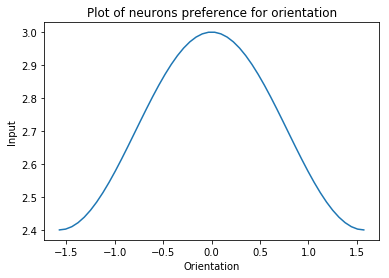

In [21]:
plt.plot(direction_array,neuron_array)
plt.title('Plot of neurons preference for orientation')
plt.xlabel('Orientation')
plt.ylabel('Input')

### Task 1.3 
- The inputs to the neurons are non-linearly filtered given an activation function g. The function
is defined by:

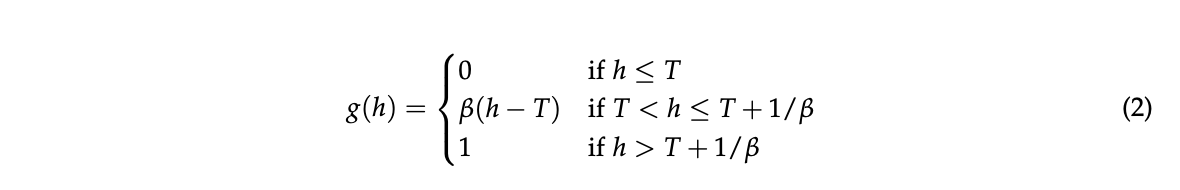

In [23]:
#should be able to take vectors as inputs

def g(h, T, beta):
    if h<= T:
        g = 0
    elif T < h <= T + 1/beta:
        g = beta*(h-T)
    else:
        g =1
    return g

### Task 1.4 
- Set T = 0 and β = 0.1. Plot g as a function of the input h when h is a scalar varying between -15 and 15.

In [29]:
h = np.arange(-15,15,1)

In [31]:
g_array = []
T = 0
beta = 0.1

for i in range(len(h)):
    g_array.append(g(h[i], T , beta))

Text(0, 0.5, 'g')

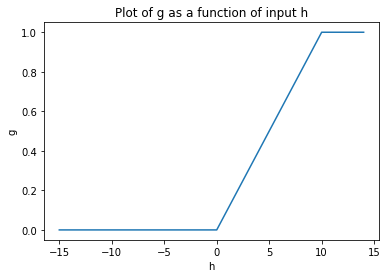

In [32]:
plt.plot(h,g_array)
plt.title('Plot of g as a function of input h, h_step=1')
plt.xlabel('h')
plt.ylabel('g')

Text(0, 0.5, 'g')

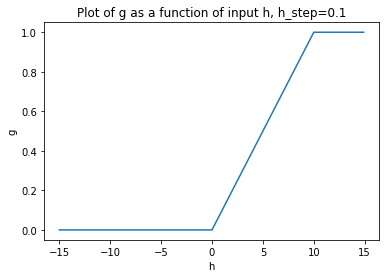

In [33]:
h = np.arange(-15,15,0.1)
g_array = []
T = 0
beta = 0.1

for i in range(len(h)):
    g_array.append(g(h[i], T , beta))

plt.plot(h,g_array)
plt.title('Plot of g as a function of input h, h_step=0.1')
plt.xlabel('h')
plt.ylabel('g')

stepsize literally makes no difference. Is it meant to be sigmoidal?

----

## Step 2: Modelling the neurons

### Task 2.1 
- The rate-based neuron models are described by:

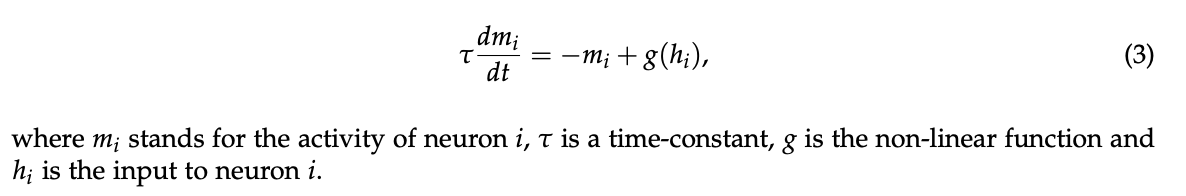

In [32]:
h_array = np.arange(-15,15,0.1)
m_array = []
m_0 = np.zeros(n_neurons)

In [33]:
def rate_neuron(h, m, timestep, threshold, beta):

    tau = 5
    
    ## m(t+1) = m(t) + timestep/tau * (-m(t) + g(h))
    m+=(timestep/tau)*(g(h,threshold,beta)-m)    
   
    return m

In [34]:

timestep = 1
threshold=0
beta = 0.1

for i in range(n_neurons):
    m_array.append(rate_neuron(h_array[i],m_0[i]), timestep, threshold, beta)

## Task 2.2

* Set N=50 for 30 iterations
* Arguments for this function are :
    * initial activity of the network, theta0
    * N, number of neurons
    * Ni, number of iterations
    * epsilon
    * c
    
 1. Test the function with zero initial activity i.e. theta0=0 , N=50 neurons, Ni= 30 iterations, epsilon = 0.9, c= 1.5
 2. Plot the activity of the network over time using the MATLAB function image

In [54]:
theta_zero =0 
N_neuron = 50
N_iteration = 30
epsilon_2 = 0.9
c_2 =1.5
neurons_2 = np.zeros(N_neuron)

In [53]:
h_input(theta0, theta, c, epsilon):

for i in range(n_neurons):
    m_array.append(rate_neuron(h_array[i],m_0[i]), tau, timestep, threshold, beta)

SyntaxError: invalid syntax (<ipython-input-53-86820214a7ff>, line 1)

In [55]:
for i in range(N_neuron):
    neurons_2[i] = h_input(theta_zero, direction_array[i], c_2, epsilon_2)

In [56]:
neurons_2

array([-1.2       , -1.18891652, -1.15584807, -1.10133762, -1.02628025,
       -0.93190839, -0.81977162, -0.69171123, -0.54982997, -0.39645751,
       -0.23411224, -0.06545986,  0.10673037,  0.27963108,  0.45040326,
        0.61624282,  0.77442669,  0.92235749,  1.0576062 ,  1.17795204,
        1.28141894,  1.36630797,  1.43122526,  1.47510486,  1.49722628,
        1.49722628,  1.47510486,  1.43122526,  1.36630797,  1.28141894,
        1.17795204,  1.0576062 ,  0.92235749,  0.77442669,  0.61624282,
        0.45040326,  0.27963108,  0.10673037, -0.06545986, -0.23411224,
       -0.39645751, -0.54982997, -0.69171123, -0.81977162, -0.93190839,
       -1.02628025, -1.10133762, -1.15584807, -1.18891652, -1.2       ])

In [57]:
for iteration in range(N_iteration):
    for i in range(N_neuron):
        neurons_2[i]=h_input(theta_zero, direction_array[i], c_2, epsilon_2)

In [58]:
neurons_2

array([-1.2       , -1.18891652, -1.15584807, -1.10133762, -1.02628025,
       -0.93190839, -0.81977162, -0.69171123, -0.54982997, -0.39645751,
       -0.23411224, -0.06545986,  0.10673037,  0.27963108,  0.45040326,
        0.61624282,  0.77442669,  0.92235749,  1.0576062 ,  1.17795204,
        1.28141894,  1.36630797,  1.43122526,  1.47510486,  1.49722628,
        1.49722628,  1.47510486,  1.43122526,  1.36630797,  1.28141894,
        1.17795204,  1.0576062 ,  0.92235749,  0.77442669,  0.61624282,
        0.45040326,  0.27963108,  0.10673037, -0.06545986, -0.23411224,
       -0.39645751, -0.54982997, -0.69171123, -0.81977162, -0.93190839,
       -1.02628025, -1.10133762, -1.15584807, -1.18891652, -1.2       ])